In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
#런타임 재시작

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/mnt')\

Mounted at /content/mnt


In [6]:
result_folder = '/content/mnt/MyDrive/results/CCTV'

In [9]:
!ls -l $result_folder

total 4
-rw------- 1 root root  975 Sep  7 06:44 cctv.csv
-rw------- 1 root root 2115 Sep  7 06:36 서울시주민등록인구.csv


In [18]:
df_cctv = pd.read_csv(f'{result_folder}/cctv.csv', encoding='utf-8')
print(df_cctv.shape)
df_cctv.head()

(26, 7)


,구분,총계,2017년 이전,2018년,2019년,2020년,2021년
0,계,77032,42455,9876,11961,11132,1608
1,종로구,1772,1435,85,9,200,43
2,중 구,2333,1142,386,155,361,289
3,용산구,2383,1334,125,307,617,0
4,성동구,3602,2413,390,262,461,76


In [39]:
df_ingu = pd.read_csv(f'{result_folder}/서울시주민등록인구.csv', encoding='utf-8')
print(df_ingu.shape)
df_ingu.head()

(26, 14)


,index,자치구,세대,계,남자,여자,한국인계,한국인남자,한국인여자,외국인계,외국인남자,외국인여자,세대당인구,65세이상고령자
0,0,합계,4405638,9795426,4756178,5039248,9565990,4649442,4916548,229436,106736,122700,2.17,1576971
1,1,종로구,73525,155106,75009,80097,146029,70985,75044,9077,4024,5053,1.99,27605
2,2,중구,62897,132259,64526,67733,123016,60019,62997,9243,4507,4736,1.96,23980
3,3,용산구,111650,240665,116858,123807,226378,108948,117430,14287,7910,6377,2.03,38884
4,4,성동구,134542,295767,143927,151840,289162,141042,148120,6605,2885,3720,2.15,45591


In [35]:
df_cctv['자치구'] = df_cctv['자치구'].apply(lambda x: x.replace(' ',''))
df_cctv.columns = ['자치구','총계','2017년이전','2018년','2019년','2020년','2021년']
df_cctv['자치구'][0] = '합계'
df_cctv['자치구'][1] = '종로구'
df_cctv.head()

,자치구,총계,2017년이전,2018년,2019년,2020년,2021년
0,합계,77032,42455,9876,11961,11132,1608
1,종로구,1772,1435,85,9,200,43
2,중구,2333,1142,386,155,361,289
3,용산구,2383,1334,125,307,617,0
4,성동구,3602,2413,390,262,461,76


In [40]:
df_merge = pd.merge(df_cctv, df_ingu, how = 'left', on='자치구')
df_merge.head()

,자치구,총계,2017년이전,2018년,2019년,2020년,2021년,index,세대,계,남자,여자,한국인계,한국인남자,한국인여자,외국인계,외국인남자,외국인여자,세대당인구,65세이상고령자
0,합계,77032,42455,9876,11961,11132,1608,0,4405638,9795426,4756178,5039248,9565990,4649442,4916548,229436,106736,122700,2.17,1576971
1,종로구,1772,1435,85,9,200,43,1,73525,155106,75009,80097,146029,70985,75044,9077,4024,5053,1.99,27605
2,중구,2333,1142,386,155,361,289,2,62897,132259,64526,67733,123016,60019,62997,9243,4507,4736,1.96,23980
3,용산구,2383,1334,125,307,617,0,3,111650,240665,116858,123807,226378,108948,117430,14287,7910,6377,2.03,38884
4,성동구,3602,2413,390,262,461,76,4,134542,295767,143927,151840,289162,141042,148120,6605,2885,3720,2.15,45591


- catogram

In [41]:
df1 = df_merge[['자치구', '2017년이전'	,'2018년', '2019년','2020년','2021년','계']]
df1.head()

,자치구,2017년이전,2018년,2019년,2020년,2021년,계
0,합계,42455,9876,11961,11132,1608,9795426
1,종로구,1435,85,9,200,43,155106
2,중구,1142,386,155,361,289,132259
3,용산구,1334,125,307,617,0,240665
4,성동구,2413,390,262,461,76,295767


In [50]:
df1['인구당 CCTV 수'] = (df1['2017년이전'] + df1['2018년'] + df1['2019년'] + df1['2020년']+ df1['2021년']) / df1['계']
df1.set_index(df1['자치구'], inplace=True)
del df1['자치구']
df1.head()

,2017년이전,2018년,2019년,2020년,2021년,계,인구당 CCTV 수
자치구,,,,,,,
합계,42455,9876,11961,11132,1608,9795426,0.007864
종로구,1435,85,9,200,43,155106,0.011424
중구,1142,386,155,361,289,132259,0.017640
용산구,1334,125,307,617,0,240665,0.009902
성동구,2413,390,262,461,76,295767,0.012179


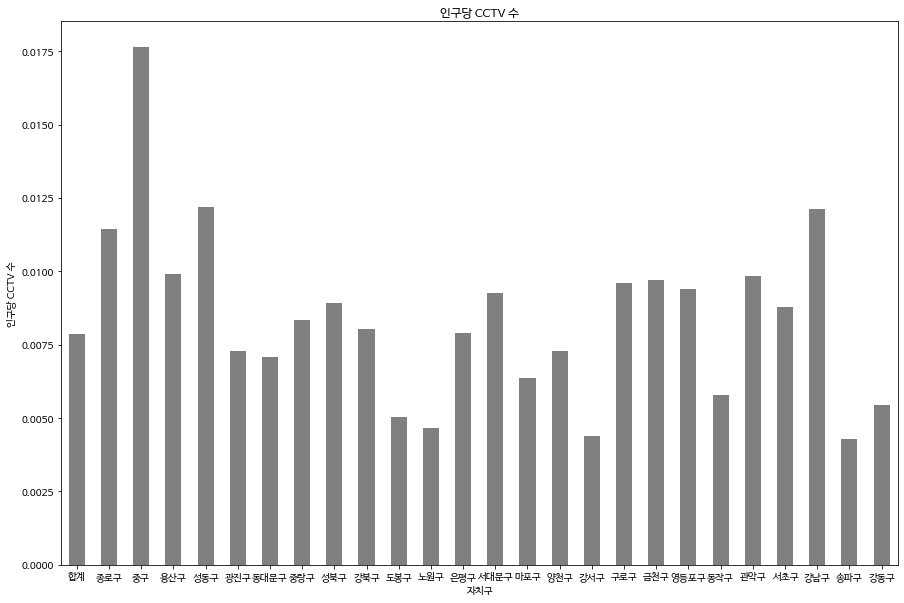

In [58]:
plt.figure(figsize=(15,10))

df1['인구당 CCTV 수'].plot(kind='bar', rot=0, color = 'gray')
plt.title("인구당 CCTV 수")
plt.xlabel("자치구")
plt.ylabel("인구당 CCTV 수")
plt.show()

In [67]:
df1.reset_index(inplace=True)

In [64]:
import folium

In [60]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving seoul-gu-simple.json to seoul-gu-simple.json


In [62]:
import json
with open(filename) as json_file:
    geo_data = json.load(json_file)

In [73]:
center = [37.581, 126.986]      # 서울 중심부 위도, 경도
map = folium.Map(location = center, zoom_start = 11, tiles = 'Stamen Toner')

folium.Choropleth(
    geo_data = geo_data,
    data = df1,
    columns = ('자치구', '인구당 CCTV 수'),
    key_on = 'feature.id',
    fill_color = 'RdBu_r',
    legend_name = '인구당 CCTV 수'
).add_to(map)
title = '<h3 align="center" style="font-size:20px">서울시 자치구 별 인구당 CCTV 수</h3>'
map.get_root().html.add_child(folium.Element(title))
map